# CPU Performance Prediction
## Introduction
The goal of this project is to predict the performance of CPUs based on various parameters such as cycle time and memory capacity. Accurate predictions can assist in selecting optimal hardware for data science and machine learning tasks.

We will perform the following steps:

1. Data Loading
2. Exploratory Data Analysis (EDA)
3. Data Preprocessing
4. Model Development
5. Model Evaluation
Conclusion

## Data Loading
The dataset contains information on various CPUs, including their vendor, model, machine cycle time, memory capacity, and performance metrics.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df=pd.read_csv(r'./Computer Hardware.csv')

## Exploratory Data Analysis (EDA)¶
We begin by exploring the dataset to understand its structure and the relationships between variables.

In [3]:
df.head()

,Seller Name,Model Name,Machine Cycle Time in nanoseconds,Minimum Main Memory in Kilobytes,Maximum Main Memory in kilobytes,Cache Memory in Kilobytes,Minimum Channels in Units,Maximum Channels in Units,Published Relative Performance,Estimated Relative Performance
0,amdahl,470v/7,29,8000,32000,32,8,32,269,253
1,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
2,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
3,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
4,amdahl,470v/b,26,8000,32000,64,8,32,318,290


In [4]:
df.columns

Index(['Seller Name', 'Model Name', 'Machine Cycle Time in nanoseconds',
       'Minimum Main Memory in Kilobytes', 'Maximum Main Memory in kilobytes',
       'Cache Memory in Kilobytes', 'Minimum Channels in Units',
       'Maximum Channels in Units', 'Published Relative Performance',
       'Estimated Relative Performance'],
      dtype='object')

In [5]:
df.columns=['Vendor','Model','MCT','MMMin','MMMax','Cache','ChMin','ChMax','PRP','ERP']

In [6]:
df.head(2)

,Vendor,Model,MCT,MMMin,MMMax,Cache,ChMin,ChMax,PRP,ERP
0,amdahl,470v/7,29,8000,32000,32,8,32,269,253
1,amdahl,470v/7a,29,8000,32000,32,8,32,220,253


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Vendor  208 non-null    object
 1   Model   208 non-null    object
 2   MCT     208 non-null    int64 
 3   MMMin   208 non-null    int64 
 4   MMMax   208 non-null    int64 
 5   Cache   208 non-null    int64 
 6   ChMin   208 non-null    int64 
 7   ChMax   208 non-null    int64 
 8   PRP     208 non-null    int64 
 9   ERP     208 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 16.4+ KB


### loop to display the unique values of each column

In [8]:
for k in df:
    print(k,":")
    print(df[k].unique())
    print('-'*150)

Vendor :
['amdahl' 'apollo' 'basf' 'bti' 'burroughs' 'c.r.d' 'cdc' 'cambex' 'dec'
 'dg' 'formation' 'four-phase' 'gould' 'hp' 'harris' 'honeywell' 'ibm'
 'ipl' 'magnuson' 'microdata' 'nas' 'ncr' 'nixdorf' 'perkin-elmer' 'prime'
 'siemens' 'sperry' 'sratus' 'wang']
------------------------------------------------------------------------------------------------------------------------------------------------------
Model :
['470v/7' '470v/7a' '470v/7b' '470v/7c' '470v/b' '580-5840' '580-5850'
 '580-5860' '580-5880' 'dn320' 'dn420' '7/65' '7/68' '5000' '8000' 'b1955'
 'b2900' 'b2925' 'b4955' 'b5900' 'b5920' 'b6900' 'b6925' '68/10-80'
 'universe:2203t' 'universe:68' 'universe:68/05' 'universe:68/137'
 'universe:68/37' 'cyber:170/750' 'cyber:170/760' 'cyber:170/815'
 'cyber:170/825' 'cyber:170/835' 'cyber:170/845' 'omega:480-i'
 'omega:480-ii' 'omega:480-iii' '1636-1' '1636-10' '1641-1' '1641-11'
 '1651-1' 'decsys:10:1091' 'decsys:20:2060' 'microvax-1' 'vax:11/730'
 'vax:11/750' 'vax:11/780'

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MCT,208.0,204.201923,260.833016,17.0,50.0,110.0,225.0,1500.0
MMMin,208.0,2880.538462,3883.839300,64.0,768.0,2000.0,4000.0,32000.0
MMMax,208.0,11824.019231,11747.916663,64.0,4000.0,8000.0,16000.0,64000.0
Cache,208.0,24.096154,37.417999,0.0,0.0,8.0,32.0,256.0
ChMin,208.0,4.644231,6.787198,0.0,1.0,2.0,6.0,52.0
ChMax,208.0,17.740385,24.913375,0.0,5.0,8.0,24.0,176.0
PRP,208.0,105.177885,161.090223,6.0,27.0,49.5,111.5,1150.0
ERP,208.0,98.850962,154.974961,15.0,28.0,45.0,99.5,1238.0


### Visualizing the distribution for each column

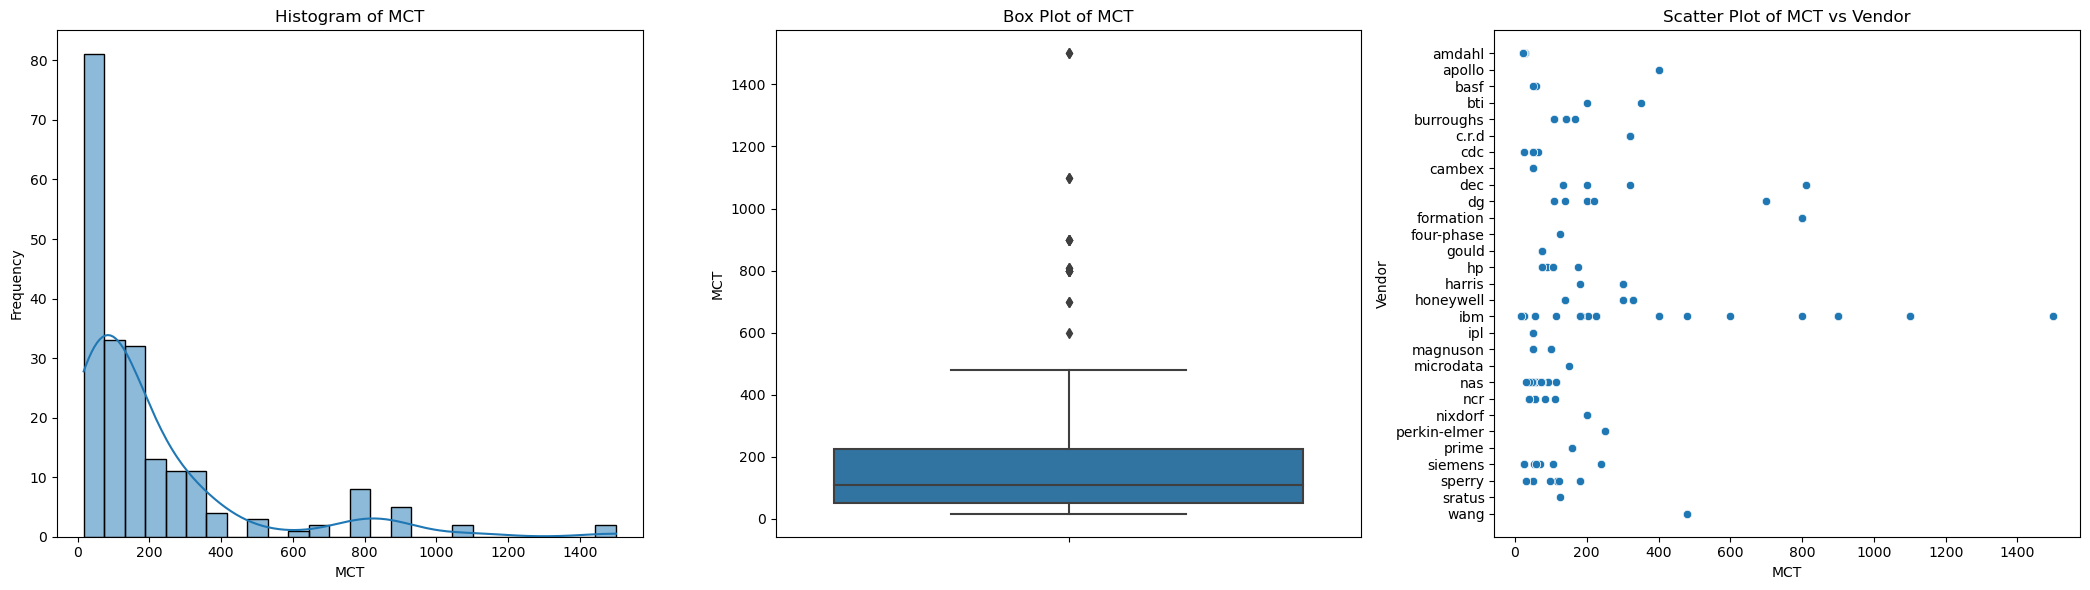

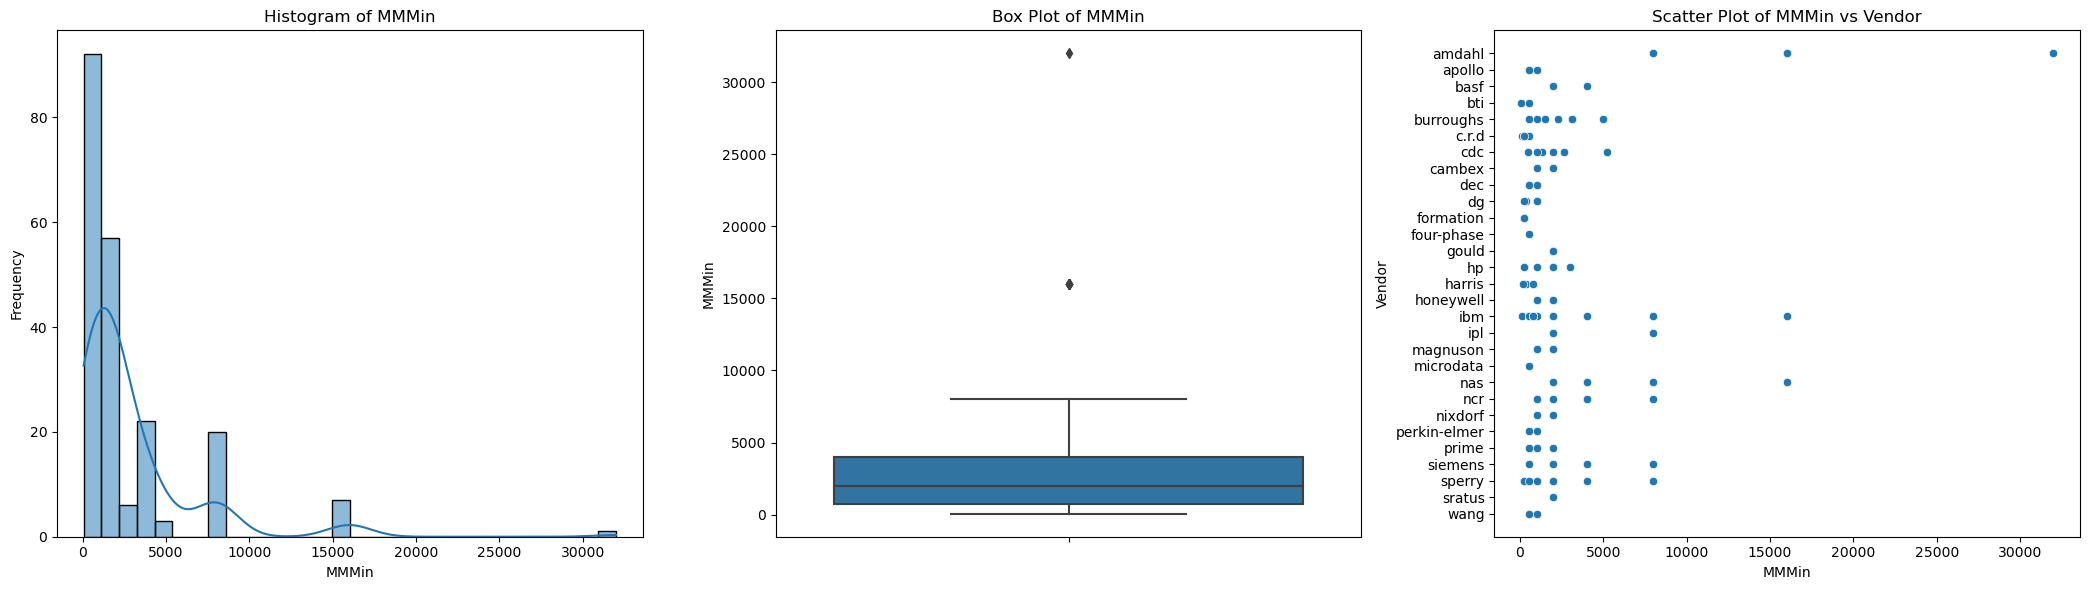

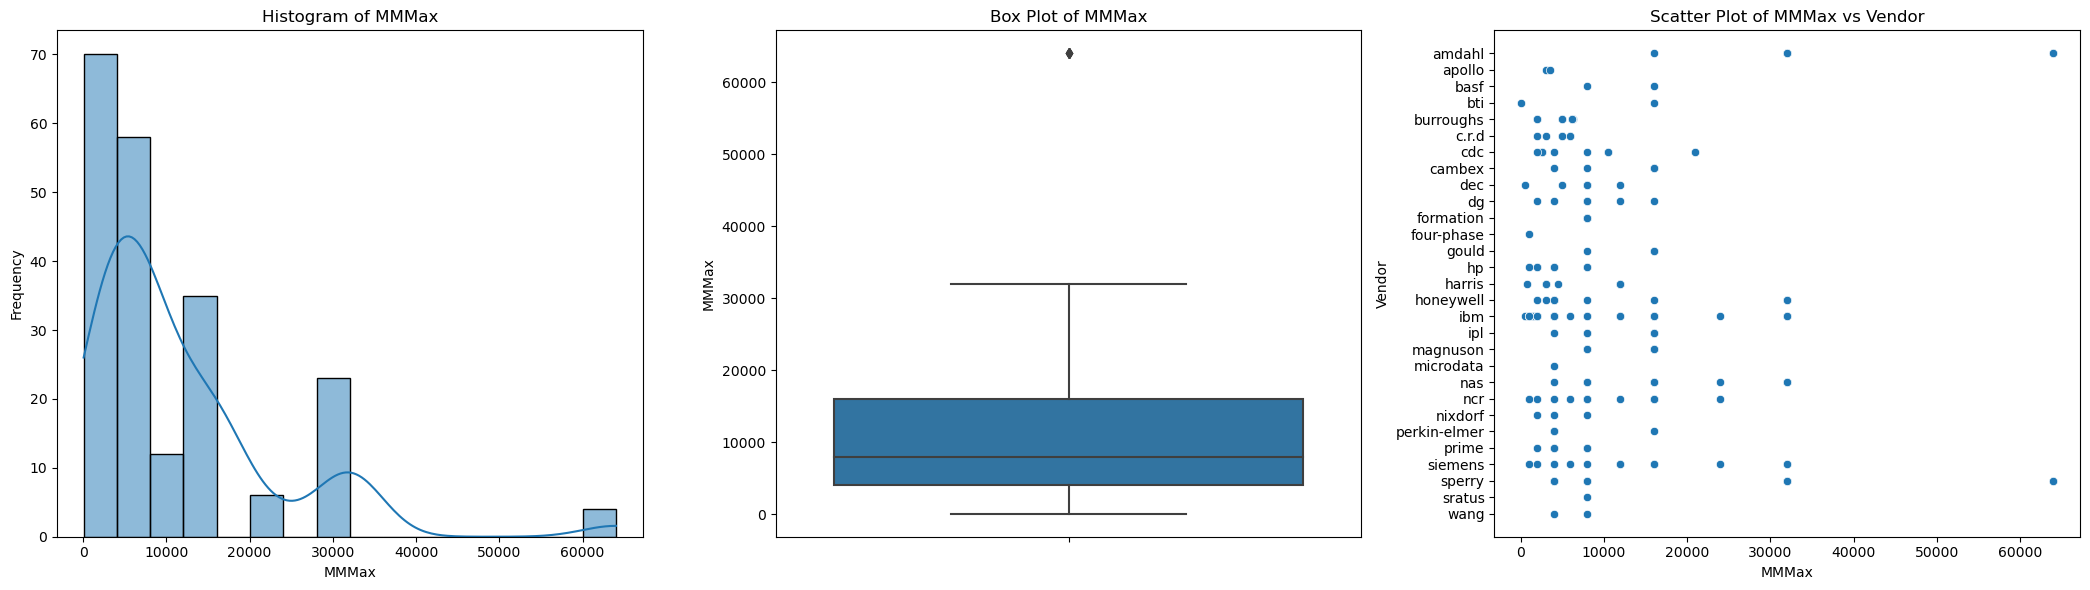

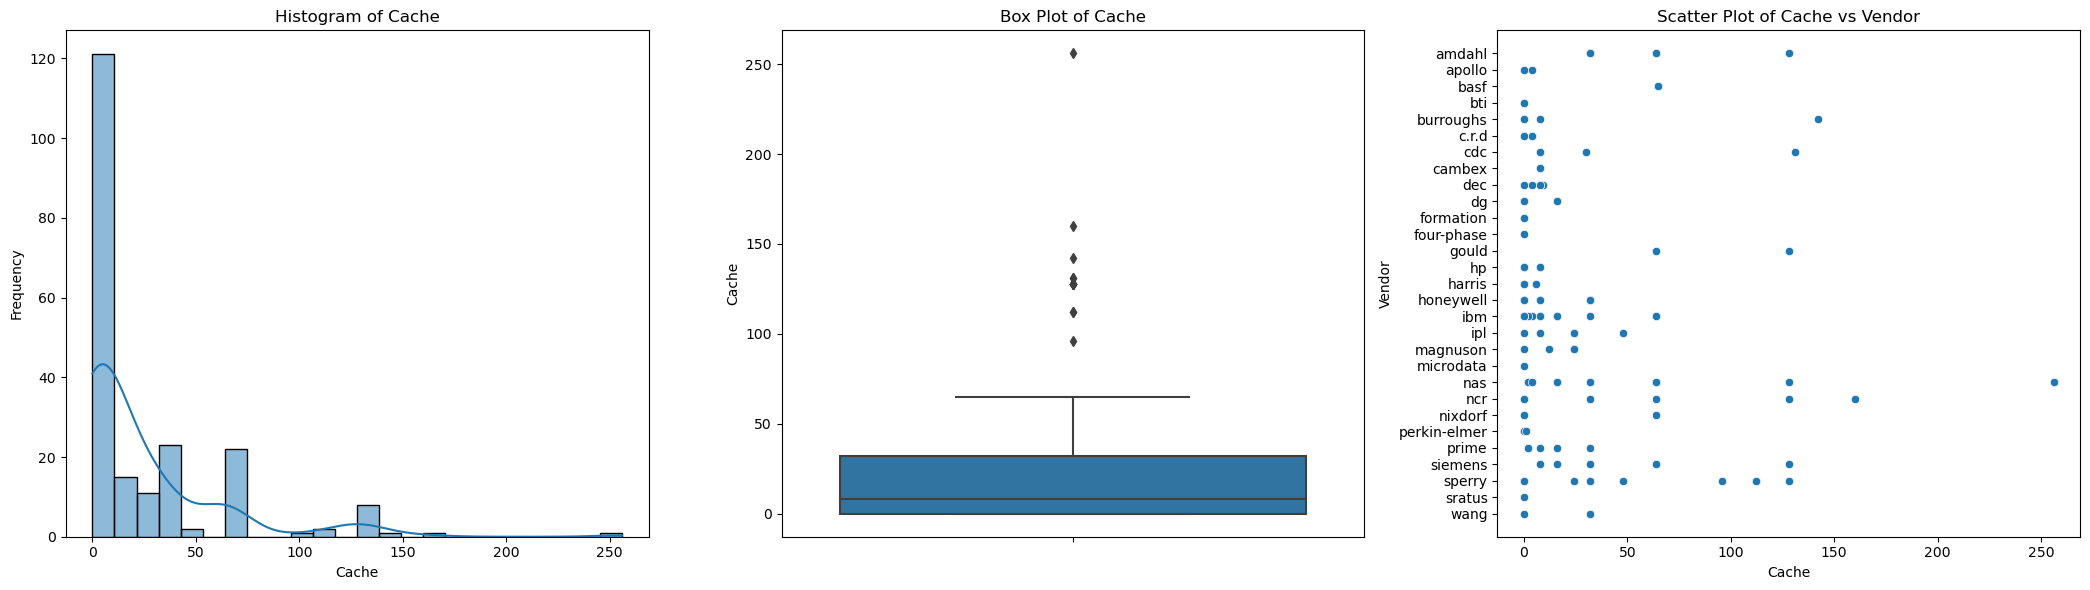

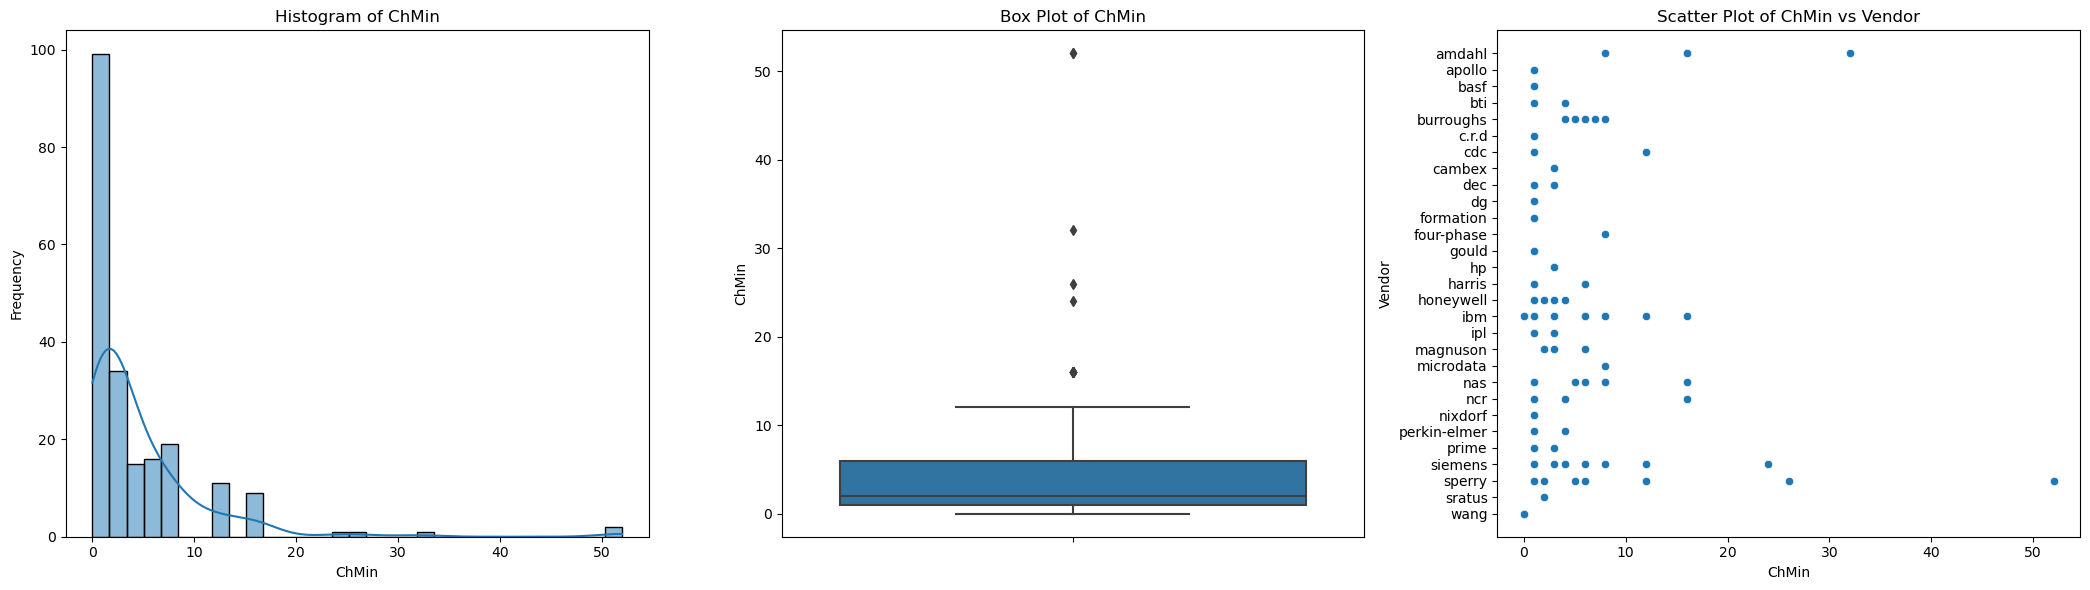

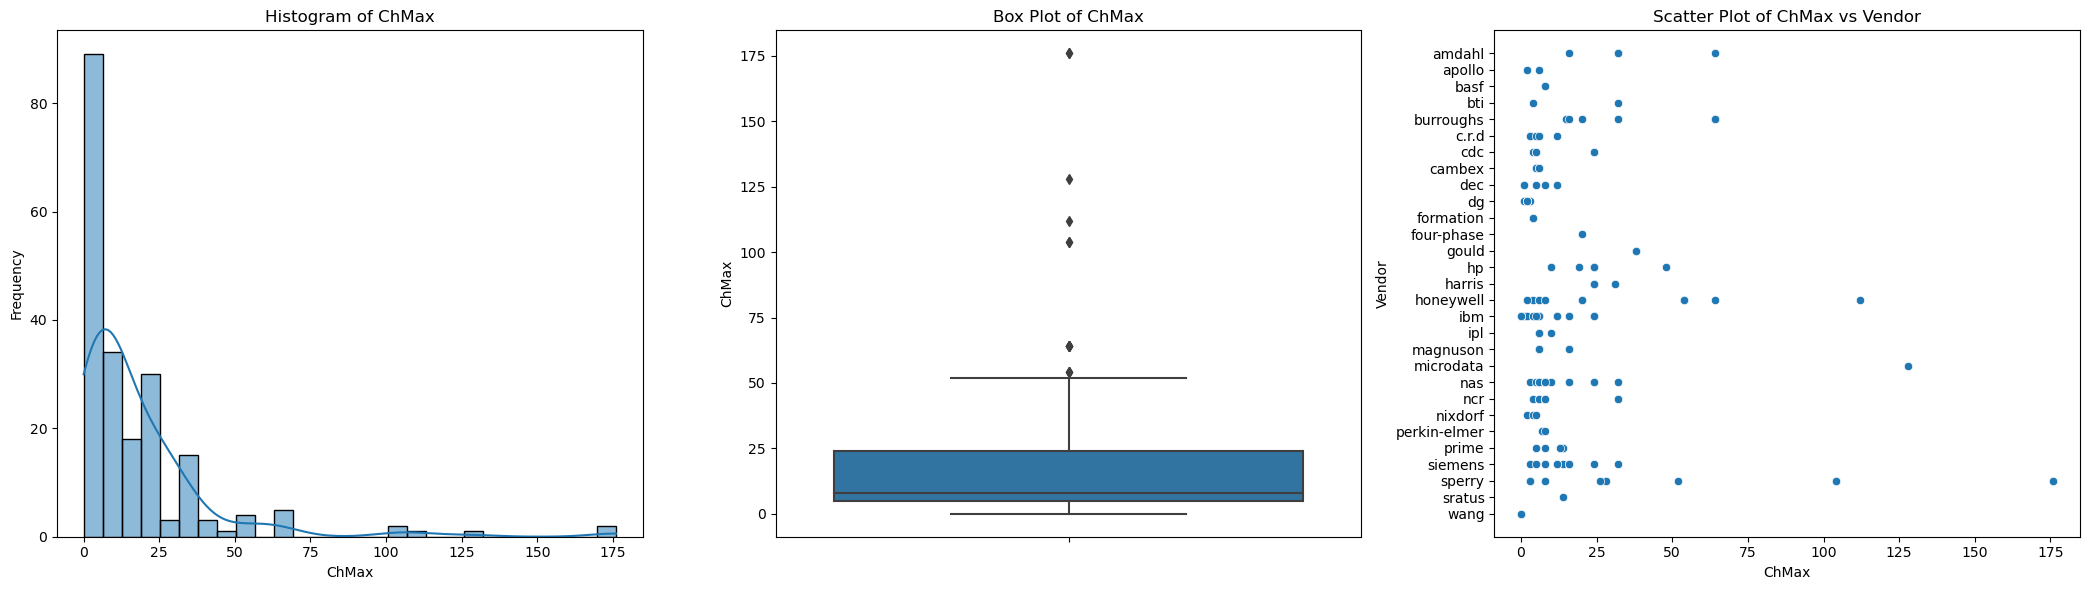

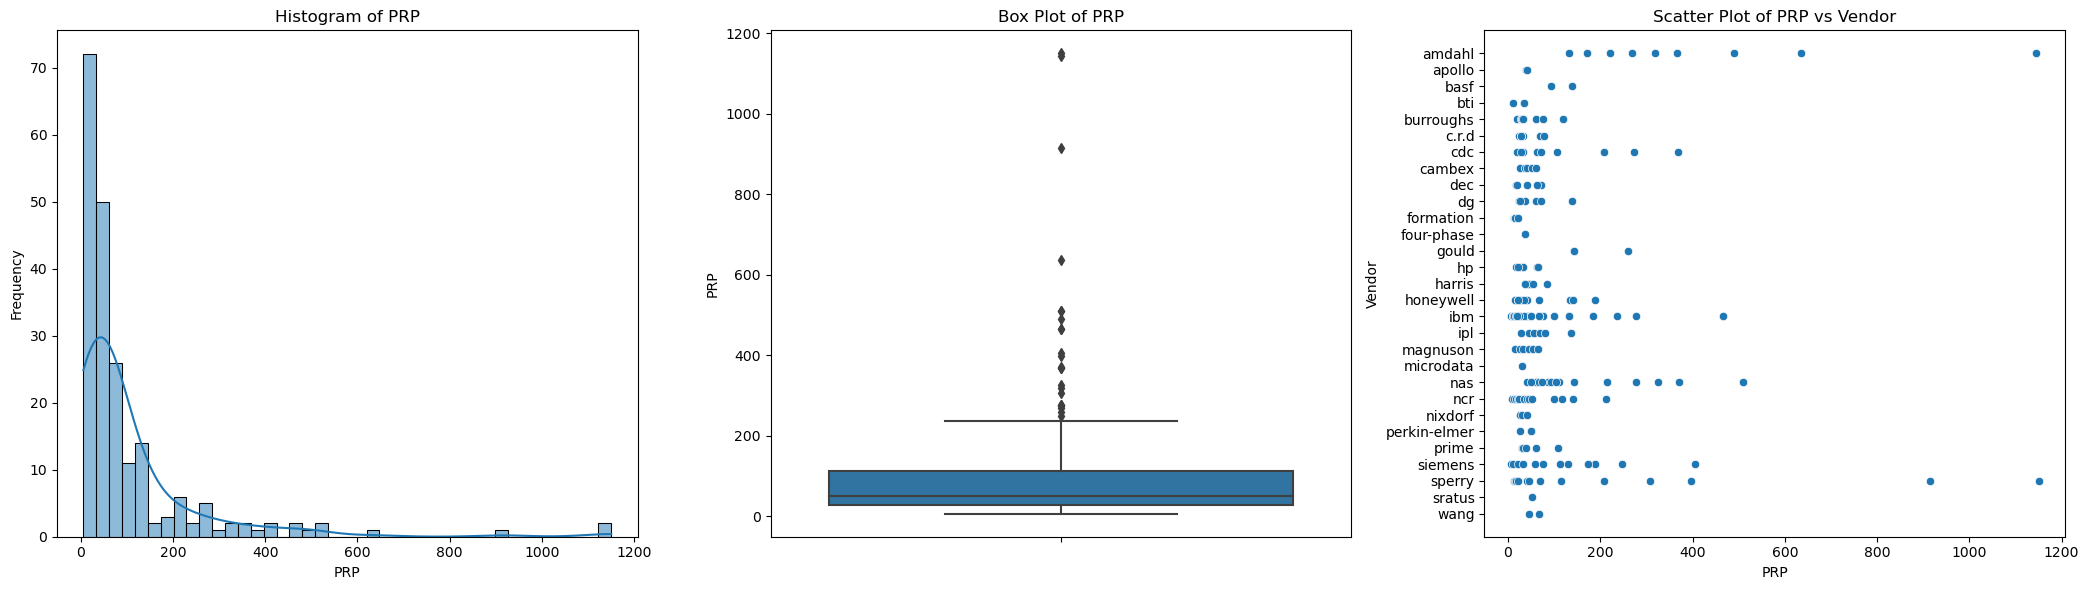

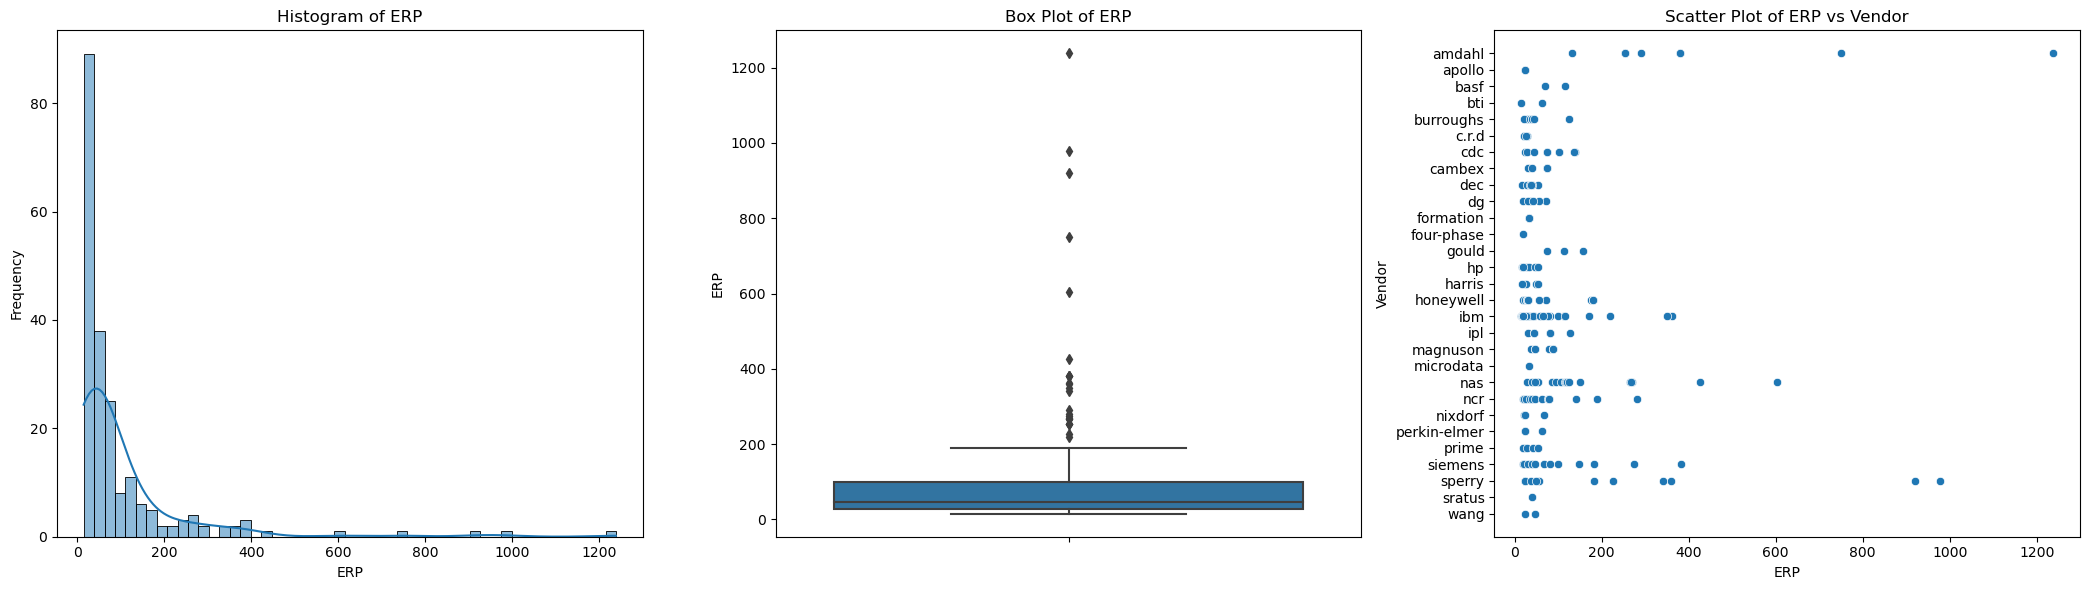

In [10]:

for column in df.select_dtypes(include='int64').columns:
    plt.figure(figsize=(21, 6))

    # Histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    # Box Plot
    plt.subplot(1, 3, 2)
    sns.boxplot(y=df[column])
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)

    # Scatter Plot
    plt.subplot(1, 3, 3)
    # Scatter plot comparing each numerical column against the first encoded vendor column (as an example)
    # Adjust the y-axis accordingly if there are multiple encoded vendor columns
    sns.scatterplot(x=df[column], y=df['Vendor'])  # Replace 'Vendor_B' with the appropriate vendor column if needed
    plt.title(f'Scatter Plot of {column} vs Vendor')
    plt.xlabel(column)
    plt.ylabel('Vendor')

    plt.tight_layout()
    plt.show()

#### A heatmap was used to visualize the correlation of the columns with each other. In the visual, it can be seen that the first column has a weak negative correlation with all columns and the other 5 columns have a strong positive correlation with the target. However, no action will be taken in this regard yet.

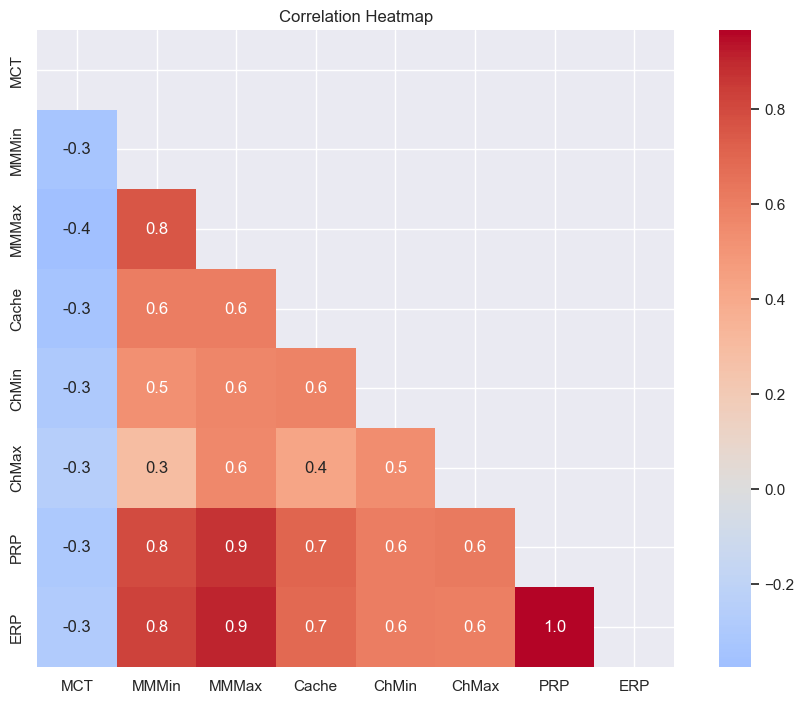

In [11]:
numerical_df = df.iloc[2:].select_dtypes(include=[np.number])
# Setting the size of the heatmap
sns.set(rc={'figure.figsize': (11.7, 8.27)})
# Creating a mask for the upper triangle
mask = np.triu(np.ones_like(numerical_df.corr(), dtype=bool))
# Creating the heatmap
sns.heatmap(data=numerical_df.corr(), annot=True, fmt=".1f", center=0, square=True, mask=mask, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Data Preprocessing
convert categorical variables (Vendor and Model) into dummy/indicator variables.

In [12]:
df = pd.get_dummies(df, columns=['Vendor', 'Model'], drop_first=True)

In [13]:
df[df['MMMax']==64000].iloc[:, :8]

,MCT,MMMin,MMMax,Cache,ChMin,ChMax,PRP,ERP
7,23,16000,64000,64,16,32,636,749
8,23,32000,64000,128,32,64,1144,1238
197,30,8000,64000,96,12,176,915,919
198,30,8000,64000,128,12,176,1150,978


In [14]:
df['MMMax'].mode()

0    8000
Name: MMMax, dtype: int64

In [15]:
df[(df['MMMin']==32000)|(df['MMMin']==16000)].iloc[:, :8]

,MCT,MMMin,MMMax,Cache,ChMin,ChMax,PRP,ERP
5,23,16000,32000,64,16,32,367,381
6,23,16000,32000,64,16,32,489,381
7,23,16000,64000,64,16,32,636,749
8,23,32000,64000,128,32,64,1144,1238
94,26,16000,32000,64,16,24,465,361
95,26,16000,32000,64,8,24,465,350
152,38,16000,32000,128,16,32,510,426
155,30,16000,32000,256,16,24,510,603


In [16]:
df[df['PRP']>df['ERP']].iloc[:, :8]

,MCT,MMMin,MMMax,Cache,ChMin,ChMax,PRP,ERP
0,29,8000,32000,32,8,32,269,253
4,26,8000,32000,64,8,32,318,290
6,23,16000,32000,64,16,32,489,381
9,400,1000,3000,0,1,2,38,23
10,400,512,3500,4,1,6,40,24
...,...,...,...,...,...,...,...,...
198,30,8000,64000,128,12,176,1150,978
203,124,1000,8000,0,1,8,42,37
205,125,2000,8000,0,2,14,52,41
206,480,512,8000,32,0,0,67,47


## Model Development

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Split the data

In [25]:
X = df.drop(['PRP','ERP'], axis=1)
y_published = df['PRP']
y = df['ERP']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

It is divided into train and test with a ratio of 20/80 and the target is initially taken as the Estimated Relative Performance column.

Let's run the model and see the number of columns and rows of the partition in test and train.

In [27]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
y_pred= regressor.predict(X_test)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(166, 241) (166,)
(42, 241) (42,)


## Model Evaluation

Let's get acquainted with the results. The following metrics are important for regression.

In [28]:
print('R^2:                          ' ,metrics.r2_score(y_test, y_pred))
print('Adjusted R^2:                 ' , 1 - (1-metrics.r2_score(y_test, y_pred)) * (len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('Mean Absolute Error:          ' , metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:           ' , metrics.mean_squared_error(y_test, y_pred)) 
print('Root Mean Squared Error:      ' , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R^2:                           0.9109686266850605
Adjusted R^2:                  1.1932917973284871
Mean Absolute Error:           36.602779715424404
Mean Squared Error:            2589.6426349588273
Root Mean Squared Error:       50.8885314678939


Tabular form: existing, predicted and differences obtained by subtracting the first from the other under the name "Resuduals"

In [33]:
df_new_pred = pd.DataFrame({'Actual': np.array(y_test).reshape(-1), 'Predicted': y_pred.reshape(-1),
                            'Residuals':np.array(y_test).reshape(-1)-(y_pred.reshape(-1))})

In [34]:
df_new_pred.head()

,Actual,Predicted,Residuals
0,47,69.623184,-22.623184
1,23,-27.030045,50.030045
2,25,28.026251,-3.026251
3,220,260.931533,-40.931533
4,142,234.291642,-92.291642


### Creating the plots separately to avoid overlap
Plot 1: Predicted vs Residuals                                                    
Plot 2: Actual vs Predicted                                      


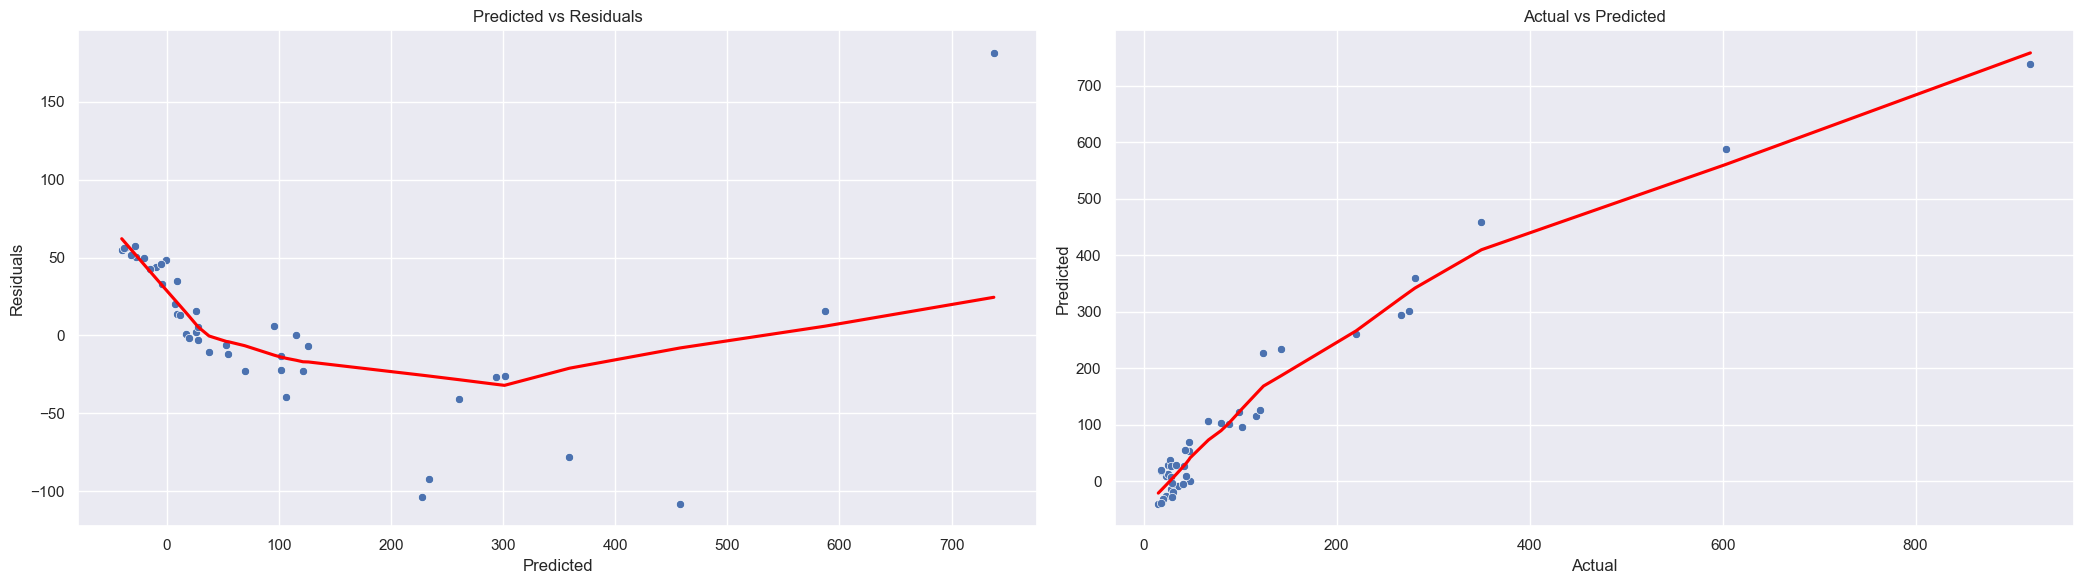

In [36]:
plt.figure(figsize=(21, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df_new_pred, x='Predicted', y='Residuals')
sns.regplot(data=df_new_pred, x='Predicted', y='Residuals', lowess=True, scatter=False, color='red')
plt.title('Predicted vs Residuals')
plt.xlabel('Predicted')
plt.ylabel('Residuals')

plt.subplot(1, 2, 2)
sns.scatterplot(data=df_new_pred, x='Actual', y='Predicted')
sns.regplot(data=df_new_pred, x='Actual', y='Predicted', lowess=True, scatter=False, color='red')
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.tight_layout()
plt.show()

### It can be seen from the distribution of errors that the outlier was uncleaned data

<Axes: xlabel='Residuals', ylabel='Count'>

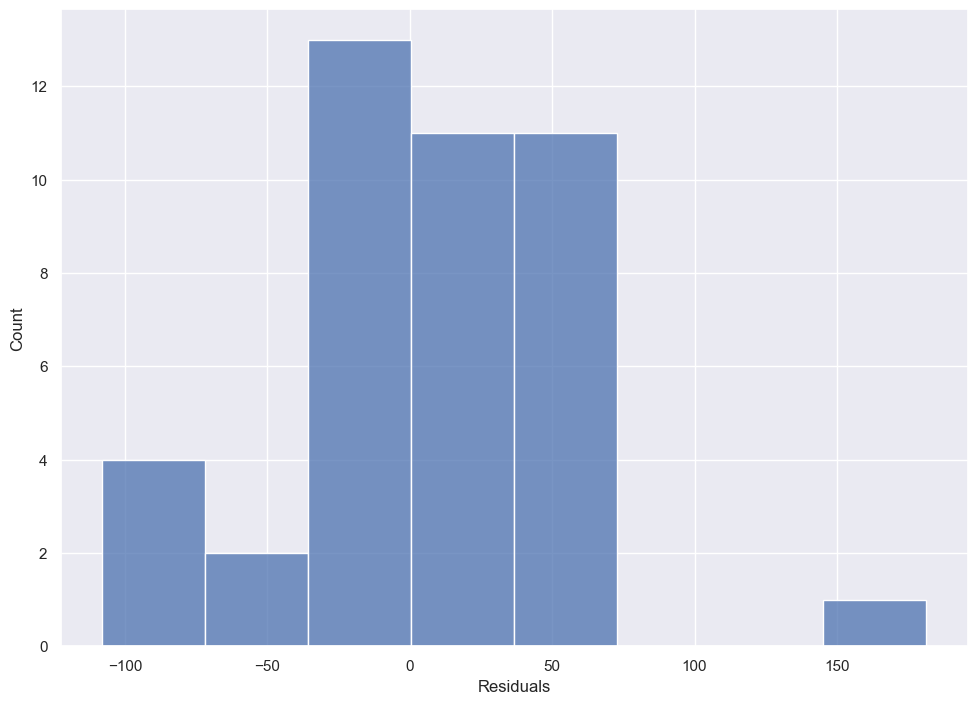

In [39]:
sns.histplot(data=df_new_pred,x='Residuals')

## Conclusion
The linear regression model provides an initial approach to predicting CPU performance. Further improvements can be made by exploring other models and tuning hyperparameters. Future work can also include feature engineering and using more advanced machine learning techniques.